In [152]:
import QPGC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

In [220]:
num_points_class1 = 50
num_points_class2 = 50
k = 1

In [221]:
class1 = np.array(np.random.multivariate_normal([0.,0.], [[1,-0.9],[-0.9,1]], num_points_class1))
class2 = np.array(np.random.multivariate_normal([3.,6.], [[1,0],[0,1]], num_points_class2))
non_separable = np.array(np.random.multivariate_normal([1.,2.], [[1,0],[0,1]], 500))

In [222]:
nd = np.concatenate((class1, class2), axis=0)
labels = np.concatenate((-np.ones(num_points_class1),np.ones(num_points_class2)), axis=0)

In [223]:
total_points = num_points_class1+num_points_class2
G = np.diag(labels) @ nd @ np.transpose(nd) @ np.diag(labels)
g = -np.ones(total_points)
A = labels.reshape(total_points,1)
b = np.zeros(1)
C = np.concatenate((np.diag(np.ones(total_points)), np.diag(-np.ones(total_points)))).T
d = np.concatenate((np.zeros(total_points), (-1)*k*np.ones(total_points)))


In [224]:
alpha = QPGC.QPGenericConstraints(G,g,A,C,b,d)

In [225]:
alpha

array([1.41911575e-10, 9.23173551e-11, 1.69932261e-11, 3.99052747e-11,
       6.09937095e-11, 1.35983645e-11, 1.71477258e-11, 3.08887183e-10,
       1.59227605e-10, 1.67407095e-11, 4.83543203e-11, 2.23119918e-11,
       1.75596688e-11, 2.12778353e-11, 1.45044089e-01, 1.52360312e-11,
       2.74202515e-11, 1.93449359e-11, 2.22669898e-11, 1.20240266e-11,
       3.85013299e-11, 1.31324065e-11, 1.93190652e-11, 3.91864379e-02,
       1.68276797e-11, 2.62943225e-11, 8.57501984e-11, 1.91542092e-11,
       1.67761937e-11, 2.08182078e-11, 2.25646011e-11, 4.04162598e-11,
       2.55606072e-11, 6.96465714e-11, 2.10554217e-11, 1.44887189e-11,
       1.75131233e-11, 2.15192694e-10, 1.66968244e-11, 1.44068881e-11,
       2.26990188e-11, 1.99107147e-11, 1.89029220e-11, 1.48908155e-11,
       1.49010280e-11, 1.89460168e-11, 1.74519683e-11, 1.96783496e-11,
       2.15404192e-11, 1.63393826e-11, 1.24337661e-11, 2.61628647e-11,
       1.53418009e-11, 1.05660260e-11, 1.19167884e-11, 1.09748626e-11,
      

In [226]:
w = (alpha * labels)[:,None] * nd
w = np.sum(w, axis=0)
print(w)

[0.34086273 0.50226851]


In [227]:
index = np.argmax(alpha)
b = labels[index] -(w.T @ nd[index])

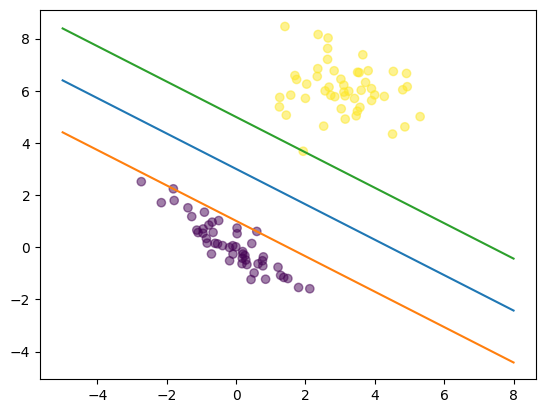

In [232]:
plt.scatter(nd[:,0], nd[:,1],c=labels, alpha=0.5)
a = -w[0] / w[1]
xx = np.linspace(-5, 8)
yy = (a * xx) - ((b) / w[1])
yy_max = (a * xx) - ((b+1) / w[1])
yy_min = (a * xx) - ((b-1) / w[1])
plt.plot(xx,yy)
plt.plot(xx,yy_max)
plt.plot(xx,yy_min)

In [233]:
# Create support vector classifier
svc = LinearSVC(C=1.0)

# Train model
model = svc.fit(nd, labels)
w = model.coef_[0]
b = model.intercept_



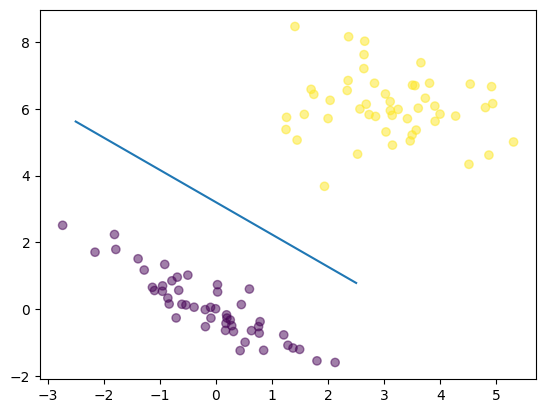

In [234]:
plt.scatter(nd[:,0], nd[:,1],c=labels, alpha=0.5)
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = (a * xx) - ((b) / w[1])
plt.plot(xx,yy)